# 初始化所有的点

In [1]:
import random

In [2]:
import matplotlib.pylab as plt

In [10]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitudes = [random.randint(-100, 100) for _ in range(20)]

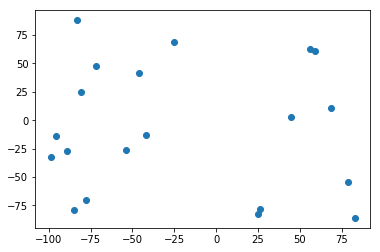

In [11]:
plt.scatter(latitudes, longitudes)

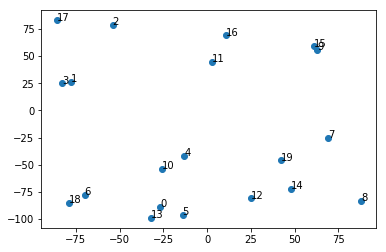

In [12]:
fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)
for i in range(20):
    ax.annotate(i, (longitudes[i], latitudes[i]))

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

# 计算所有点两两之间的距离

In [22]:
import numpy as np
def get_distance(x:tuple,y:tuple)-> float:
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

coordinates = list(zip(longitudes, latitudes)) 
length=len(coordinates)

dp=[[float('inf')]*2**(length-1) for _ in range(length)]
all_distances={frozenset([i,j]):get_distance(coordinates[i],coordinates[j]) for i in range(length) for j in range(i+1,length)}

In [23]:
dp

[[inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,

In [24]:
all_distances

{frozenset({0, 1}): 125.80143083447024,
 frozenset({0, 2}): 170.1558109498468,
 frozenset({0, 3}): 127.01181047445942,
 frozenset({0, 4}): 49.040799340956916,
 frozenset({0, 5}): 14.7648230602334,
 frozenset({0, 6}): 44.384682042344295,
 frozenset({0, 7}): 115.37764081484765,
 frozenset({0, 8}): 115.15641536623133,
 frozenset({0, 9}): 170.66048165876012,
 frozenset({0, 10}): 35.014282800023196,
 frozenset({0, 11}): 137.31715115017496,
 frozenset({0, 12}): 52.61178575186362,
 frozenset({0, 13}): 11.180339887498949,
 frozenset({0, 14}): 76.90253571892151,
 frozenset({0, 15}): 172.18594600024707,
 frozenset({0, 16}): 162.50538452617502,
 frozenset({0, 17}): 181.8378398463862,
 frozenset({0, 18}): 52.15361924162119,
 frozenset({0, 19}): 81.30190649671138,
 frozenset({1, 2}): 58.180752831155424,
 frozenset({1, 3}): 5.0990195135927845,
 frozenset({1, 4}): 94.06912352095134,
 frozenset({1, 5}): 137.7679207943562,
 frozenset({1, 6}): 104.30723848324239,
 frozenset({1, 7}): 155.59562975867928,


# 正式求解过程，把dp表填完，求解最短路径

In [63]:
def tsp(coordinates):
    tsp.solution={}
    length=len(coordinates)
    dp=[[float('inf')]*(2**(length-1))for _ in range(length)]    
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    for i in range(length):
        if i==0:
            continue
        dp[i][0]=all_distances [ frozenset({i, 0})]
    for j in range(1,2**(length-1)):
        for i in range(length):
            if i!=0 and  ((j>>(i-1))&1)==1:  #本身就在目标集合中(j的第i-1位等于1)
                continue
            for k in range (1,length):
                if k!=0 and ((j>>(k-1))&1)==0:#j的第k-1位等于0
                    continue
                pos=j^(1<<(k-1))  #取得集合对应的编码
                tmp_dist=all_distances [ frozenset({i, k})]+ dp[k][pos]
                if  dp[i][j]>tmp_dist:
                    dp[i][j]=tmp_dist
                    tsp.solution[(i,j)]=(k, pos)
    return dp[0][-1]

In [64]:
coordinates

[(-27, -89),
 (-78, 26),
 (-54, 79),
 (-83, 25),
 (-13, -42),
 (-14, -96),
 (-70, -78),
 (69, -25),
 (88, -83),
 (63, 56),
 (-26, -54),
 (3, 45),
 (25, -81),
 (-32, -99),
 (48, -72),
 (61, 59),
 (11, 69),
 (-86, 83),
 (-79, -85),
 (42, -46)]

In [65]:
tsp(coordinates)

772.387578501819

In [66]:
tsp.solution

{(0, 1): (1, 0),
 (2, 1): (1, 0),
 (3, 1): (1, 0),
 (4, 1): (1, 0),
 (5, 1): (1, 0),
 (6, 1): (1, 0),
 (7, 1): (1, 0),
 (8, 1): (1, 0),
 (9, 1): (1, 0),
 (10, 1): (1, 0),
 (11, 1): (1, 0),
 (12, 1): (1, 0),
 (13, 1): (1, 0),
 (14, 1): (1, 0),
 (15, 1): (1, 0),
 (16, 1): (1, 0),
 (17, 1): (1, 0),
 (18, 1): (1, 0),
 (19, 1): (1, 0),
 (0, 2): (2, 0),
 (1, 2): (2, 0),
 (3, 2): (2, 0),
 (4, 2): (2, 0),
 (5, 2): (2, 0),
 (6, 2): (2, 0),
 (7, 2): (2, 0),
 (8, 2): (2, 0),
 (9, 2): (2, 0),
 (10, 2): (2, 0),
 (11, 2): (2, 0),
 (12, 2): (2, 0),
 (13, 2): (2, 0),
 (14, 2): (2, 0),
 (15, 2): (2, 0),
 (16, 2): (2, 0),
 (17, 2): (2, 0),
 (18, 2): (2, 0),
 (19, 2): (2, 0),
 (0, 3): (1, 2),
 (3, 3): (1, 2),
 (4, 3): (2, 1),
 (5, 3): (2, 1),
 (6, 3): (1, 2),
 (7, 3): (2, 1),
 (8, 3): (2, 1),
 (9, 3): (2, 1),
 (10, 3): (2, 1),
 (11, 3): (2, 1),
 (12, 3): (2, 1),
 (13, 3): (1, 2),
 (14, 3): (2, 1),
 (15, 3): (2, 1),
 (16, 3): (2, 1),
 (17, 3): (2, 1),
 (18, 3): (1, 2),
 (19, 3): (2, 1),
 (0, 4): (3, 0),
 

# parse solution

In [67]:
def parse(length:int,solutions:dict)->str:
    route=['0']
    def helper(row:int,col:int)->None:
        i,j=solutions[(row,col)]
        route.append(str(i))
        if j==0: return
        helper(i,j)
    helper(0,2**(length-1)-1)
    route.append('0')
    return route

def re_print(route)->str:
    print('->'.join(route))

In [68]:
route=parse(20,tsp.solution)

In [69]:
re_print(route)

0->13->18->6->10->4->1->3->17->2->11->16->15->9->7->19->8->14->12->5->0
